In [90]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

LOWER_DELETION_SIZE_LIMIT = 4000
UPPER_DELETION_SIZE_LIMIT = 10000
DELETION_ALLELE_FREQ_THRESHOLD = 0.00001

# Filter out false deletions: 
SUSPICIOUS_DELETION_SIZE_THRESHOLD = 1000000

DELETION_CLASS = 'observed' # TOPMED 

# previously used: 'constraint-labeled'
# 'genehancer' requires more effort 
ENHANCERS_CLASS = 'khurana' 

## Get windows straddling enhancers, and intersect those windows with deletions

In [91]:
from shell import shell
import pandas as pd

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

def intersect_enhancer_straddling_windows_with_deletions(deletion_type, window_size): 
  windows_with_deletions = f'{CONSTRAINT_TOOLS_DATA}/enhancer-straddling-windows/{ENHANCERS_CLASS}/enhancer-straddling-windows-intersect-{deletion_type}-{DELETION_CLASS}-deletions.bed'

  intersect_script = f'{CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/intersect-enhancer-straddling-windows-with-deletions.sh'

  cmd = (
    f'bash '
    f'{intersect_script} '
    f'{DELETION_CLASS} {windows_with_deletions} '
    f'{deletion_type} '
    f'{LOWER_DELETION_SIZE_LIMIT} {UPPER_DELETION_SIZE_LIMIT} {DELETION_ALLELE_FREQ_THRESHOLD} '
    f'{SUSPICIOUS_DELETION_SIZE_THRESHOLD} '
    f'{window_size} '
    f'{ENHANCERS_CLASS}'
  )
  print(shell(cmd))

  df = pd.read_csv(
    windows_with_deletions, 
    sep='\t',
  )

  return df 

intersect_enhancer_straddling_windows_with_deletions(
  deletion_type='short', 
  window_size=10,
) 

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
0             chr1       2332455     2332466            chr1     2332361   
1             chr1       2596255     2596266            chr1     2596161   
2             chr1       2613155     2613166            chr1     2612761   
3             chr1       2645355     2645366            chr1     2644961   
4             chr1       2801929     2801940            chr1     2801235   
...            ...           ...         ...             ...         ...   
14138         chrX     155194017   155194028            chrX   155192924   
14139         chrX     155556233   155556244            chrX   155556139   
14140         chrX     155558033   155558044            chrX   155557739   
14141         chrX     155578033   155578044            chrX   155577139   
14142         chrX     155687333   155687344            chrX   155686739   

        end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
0        2332561          6        28.000000        42.666667   
1        2596361          2        34.500000        56.250000   
2        2613561          4        30.250000        58.687500   
3        2645761          4        30.250000        58.687500   
4        2802635          2        36.500000        30.250000   
...          ...        ...              ...              ...   
14138  155195123          7        30.857143        21.551020   
14139  155556339          2        15.000000         9.000000   
14140  155558339          1        18.000000         0.000000   
14141  155578939          3        14.000000         8.000000   
14142  155687939          2        18.500000         0.250000   

       indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
0             0.540501         0.151947      2.000000      0.333333   
1             0.137321         0.000000      1.000000      0.000000   
2             0.651648         0.133834      1.250000      0.187500   
3             0.651648         0.133834      1.000000      0.000000   
4             0.547318         0.168098      1.500000      0.250000   
...                ...              ...           ...           ...   
14138         0.578222         0.110968      1.000000      0.000000   
14139         0.564644         0.098983      1.000000      0.000000   
14140         0.879259         0.000000      1.000000      0.000000   
14141         0.564644         0.098983      1.333333      0.222222   
14142         0.709217         0.028914      2.000000      0.000000   

       closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
0          0.040223  2.030436e-03       0.000133   3.471361e-09     0.000023   
1          0.000130  7.998072e-10       0.000130   7.998072e-10     0.000014   
2          0.029241  1.105202e-03       0.000133   4.150111e-10     0.000019   
3          0.029241  1.105202e-03       0.000133   4.150111e-10     0.000019   
4          0.017903  3.148755e-04       0.000149   8.886747e-11     0.000016   
...             ...           ...            ...            ...          ...   
14138      0.027698  1.155833e-03       0.000151   1.151432e-09     0.000022   
14139      0.041840  1.746797e-03       0.000058   1.741802e-10     0.000013   
14140      0.083635  0.000000e+00       0.000072   0.000000e+00     0.000021   
14141      0.027908  1.552708e-03       0.000054   1.548269e-10     0.000011   
14142      0.041853  1.745694e-03       0.000074   3.554699e-12     0.000019   

        pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
0      1.072952e-09  1.501623e-05  1.127179e-09            6.0   
1      2.705123e-11  2.506624e-37  2.965265e-75            0.0   
2      1.017613e-10  7.529664e-08  1.700875e-14            4.0   
3      1.017613e-10  7.529664e-08  1.700875e-14            0.0   
4      1.277021e-11  2.389257e-15  5.708547e-30            2.0   
...             ...           ...           ...            ...   
14138  6.229909e-10  1.250540e-07  9

## Filter enhancers by network properties

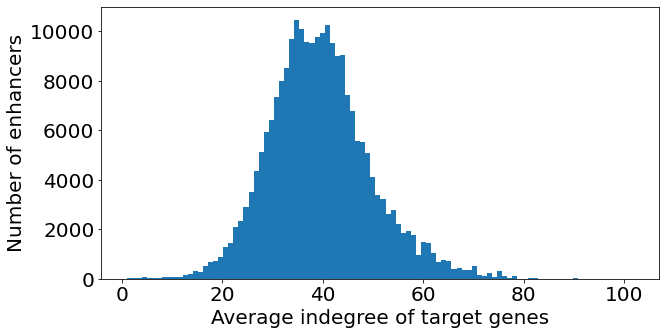

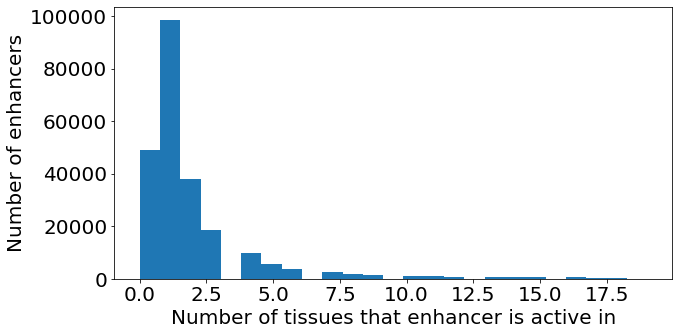

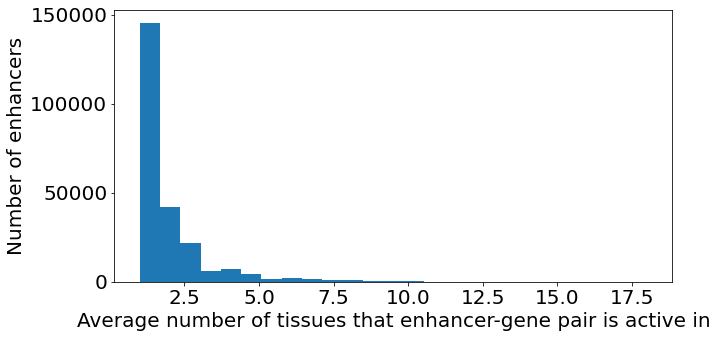

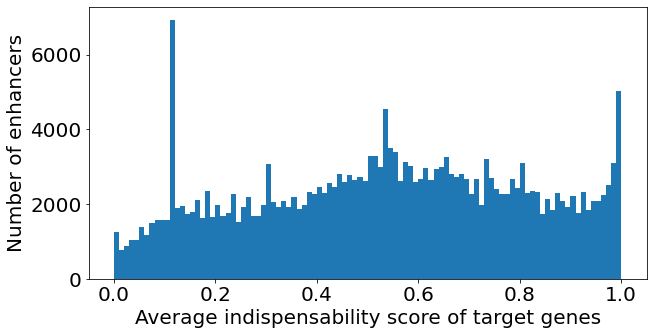

chromosome_hg38  start_hg38  end_hg38  outDegree  indegreeAveGene  \
0                 chr1       14800     15200          1         4.000000   
1                 chr1       16000     16400          1         4.000000   
2                 chr1       20200     20400          1         4.000000   
3                 chr1       79200     79800          1         4.000000   
4                 chr1      598620    599020          2         7.000000   
...                ...         ...       ...        ...              ...   
235175           chr22    50780972  50781372          3        27.666667   
235176           chr22    50782372  50783172         10        33.200000   
235177           chr22    50784372  50786372          6        30.833333   
235178           chr22    50788172  50788372          3        28.333333   
235179           chr22    50795572  50797172          2        28.500000   

        indegreeVarGene  indispenAveGene  indispenVarGene  numTissueAve  \
0              0.000000         0.499665         0.103495           1.0   
1              0.000000         0.164652         0.000000           1.0   
2              0.000000         0.650182         0.019668           3.0   
3              0.000000         0.194831         0.000000           1.0   
4             36.000000         0.084117         0.000000           1.0   
...                 ...              ...              ...           ...   
235175         8.222222         0.669443         0.000000           1.0   
235176        18.560000         0.492987         0.048604           3.8   
235177        14.472222         0.466368         0.021815           3.5   
235178        13.555556         0.517304         0.023146           1.0   
235179        20.250000         0.517304         0.023146           2.5   

        numTissueVar  closeAveGene  closeVarGene  degreeAveGene  \
0           0.000000      0.000015  0.000000e+00       0.000015   
1           0.000000      0.000015  0.000000e+00       0.000015   
2           0.000000      0.000015  0.000000e+00       0.000015   
3           0.000000      0.000015  0.000000e+00       0.000015   
4           0.000000      0.000026  5.118766e-10       0.000026   
...              ...           ...           ...            ...   
235175      0.000000      0.006646  8.559088e-05       0.000112   
235176     11.360000      0.017722  9.127898e-04       0.000143   
235177      6.916667      0.003845  5.148058e-05       0.000129   
235178      0.000000      0.006648  8.555807e-05       0.000116   
235179      2.250000      0.000107  2.879306e-10       0.000109   

        degreeVarGene  pgrkAveGene   pgrkVarGene     egAveGene     egVarGene  \
0        0.000000e+00     0.000006  0.000000e+00  2.921513e-38  0.000000e+00   
1        0.000000e+00     0.000006  0.000000e+00  2.921513e-38  0.000000e+00   
2        0.000000e+00     0.000006  0.000000e+00  2.921513e-38  0.000000e+00   
3        0.000000e+00     0.000006  0.000000e+00  2.921513e-38  0.000000e+00   
4        5.118766e-10     0.000005  8.848082e-12  5.099683e-38  1.897769e-75   
...               ...          ...           ...           ...           ...   
235175   2.496188e-10     0.000018  2.222650e-10  4.491593e-17  4.034881e-33   
235176   1.205754e-09     0.000018  5.103543e-10  7.855987e-08  4.672169e-14   
235177   7.899330e-10     0.000014  1.339652e-10  2.245796e-17  2.521800e-33   
235178   3.159732e-10     0.000020  1.849243e-10  4.491593e-17  4.034881e-33   
235179   3.554699e-10     0.000010  1.052794e-12  2.070990e-37  1.067495e-75   

        SG1_outDegree  SG1_indegreeAveGene  SG1_indegreeVarGene  \
0                 0.0             0.000000             0.000000   
1                 0.0             0.000000             0.000000   
2                 0.0             0.000000             0.000000   
3                 1.0             1.000000             0.000000   
4                 0.0             0.000000             0.000000   
...               ...    

In [92]:
import json 
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 5))
plt.rc('font', size=20)

def plot_enhancer_network_feature_distribution(): 
  with open(f'{CONSTRAINT_TOOLS_DATA}/khurana/all-enhancers-with-network-features.hg38.sorted.json', 'r') as f:
    columns = json.load(f)

  df = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/khurana/all-enhancers-with-network-features.hg38.sorted.bed', 
    sep='\t',
    names=columns,
  )  

  regular_chromosomes = set(f'chr{str(id)}' for id in list(range(1,23)) + ['X', 'Y'])
  df = df[df['chromosome_hg38'].isin(regular_chromosomes)]

  df = df[
    (df['chromosome_hg38'] != 'chrX') &
    (df['chromosome_hg38'] != 'chrY')
  ]

  df['indegreeAveGene'].plot.hist(bins=100)
  plt.xlabel('Average indegree of target genes')
  plt.ylabel('Number of enhancers')
  plt.show()
  
  df['numTissue'].plot.hist(bins=25)
  plt.xlabel('Number of tissues that enhancer is active in')
  plt.ylabel('Number of enhancers')
  plt.show()

  
  df['numTissueAve'].plot.hist(bins=25)
  plt.xlabel('Average number of tissues that enhancer-gene pair is active in')
  plt.ylabel('Number of enhancers')
  plt.show()

  df['indispenAveGene'].plot.hist(bins=100)
  plt.xlabel('Average indispensability score of target genes')
  plt.ylabel('Number of enhancers')
  plt.show()

  return df 

plot_enhancer_network_feature_distribution()

In [93]:
def filter_1(df, gene_indegree_threshold=25): 
  # enhancers that are less redundant have lower GIDa (average gene indegree)
  df = df[df['indegreeAveGene'] < gene_indegree_threshold]
  return df  

filter_1(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=20000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
3              chr1       2336260     2356261            chr1     2346161   
6              chr1       2418660     2438661            chr1     2428561   
489            chr1       9199640     9219641            chr1     9209541   
491            chr1       9204840     9224841            chr1     9214141   
492            chr1       9208840     9228841            chr1     9218741   
...             ...           ...         ...             ...         ...   
158027         chrX     155635738   155655739            chrX   155645539   
158028         chrX     155657038   155677039            chrX   155666539   
158029         chrX     155677338   155697339            chrX   155686739   
158030         chrX     155677338   155697339            chrX   155686739   
158031         chrX     155677338   155697339            chrX   155686739   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
3         2346361          3        22.000000         0.666667   
6         2428761          5        22.800000        20.960000   
489       9209741          3        24.333333        29.555556   
491       9215541          1        21.000000         0.000000   
492       9218941          3        24.333333        29.555556   
...           ...        ...              ...              ...   
158027  155645939          1        19.000000         0.000000   
158028  155667539          1        18.000000         0.000000   
158029  155687939          2        18.500000         0.250000   
158030  155687939          2        18.500000         0.250000   
158031  155687939          2        18.500000         0.250000   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
3              0.707824         0.049214           1.0           0.0   
6              0.791313         0.040649           1.0           0.0   
489            0.574737         0.038265           1.0           0.0   
491            0.733121         0.000000           1.0           0.0   
492            0.574737         0.038265           1.0           0.0   
...                 ...              ...           ...           ...   
158027         0.539176         0.000000           1.0           0.0   
158028         0.879259         0.000000           1.0           0.0   
158029         0.709217         0.028914           2.0           0.0   
158030         0.709217         0.028914           2.0           0.0   
158031         0.709217         0.028914           2.0           0.0   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
3           0.039912      0.000795       0.000097   5.055571e-11     0.000008   
6           0.045722      0.000669       0.000103   3.731012e-10     0.000009   
489         0.032332      0.000530       0.000106   1.516671e-10     0.000014   
491         0.052578      0.000000       0.000106   0.000000e+00     0.000016   
492         0.032332      0.000530       0.000106   1.516671e-10     0.000014   
...              ...           ...            ...            ...          ...   
158027      0.000072      0.000000       0.000075   0.000000e+00     0.000018   
158028      0.083635      0.000000       0.000072   0.000000e+00     0.000021   
158029      0.041853      0.001746       0.000074   3.554699e-12     0.000019   
158030      0.041853      0.001746       0.000074   3.554699e-12     0.000019   
158031      0.041853      0.001746       0.000074   3.554699e-12     0.000019   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
3       2.086705e-12  2.839922e-09  4.189292e-18            0.0   
6       3.765845e-12  3.167951e-08  3.496431e-15            0.0   
489     1.893484e-12  2.844394e-10  4.295775e-20            0.0   
491     0.000000e+00  4.879558e-10  0.000000e+00            0.0   
492     1.893484e-12  2.844394e-10  4.295775e-20            3.0   
...              ...           ...           ... 

In [94]:
def filter_2(df, enhancer_tissue_ubiquity_threshold=5): 
  # enhancers that are more pleiotropic have high ETU (enhancer tissue ubiquity)
  df = df[df['numTissue'] > enhancer_tissue_ubiquity_threshold]
  return df  

filter_2(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=20000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
8              chr1       2578560     2598561            chr1     2587361   
28             chr1       2633760     2653761            chr1     2643161   
32             chr1       2644260     2664261            chr1     2653361   
94             chr1       3026235     3046236            chr1     3035436   
95             chr1       3026235     3046236            chr1     3035436   
...             ...           ...         ...             ...         ...   
157931         chrX     154970424   154990425            chrX   154979325   
157932         chrX     154970424   154990425            chrX   154979325   
157933         chrX     154970424   154990425            chrX   154979325   
157936         chrX     155047024   155067025            chrX   155055925   
157937         chrX     155047024   155067025            chrX   155055925   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
8         2589761          9        28.222222        86.395062   
28        2644361          9        28.222222        86.395062   
32        2655161          7        30.000000        96.571429   
94        3037036          2        36.000000         1.000000   
95        3037036          2        36.000000         1.000000   
...           ...        ...              ...              ...   
157931  154981525          9        29.777778        40.839506   
157932  154981525          9        29.777778        40.839506   
157933  154981525          9        29.777778        40.839506   
157936  155058125         10        29.000000        39.200000   
157937  155058125         10        29.000000        39.200000   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
8              0.608295         0.128440      8.333333     27.333333   
28             0.608295         0.128440      6.222222     19.506173   
32             0.522830         0.142036      3.000000      2.571429   
94             0.396594         0.038809     10.500000      0.250000   
95             0.396594         0.038809     10.500000      0.250000   
...                 ...              ...           ...           ...   
157931         0.495179         0.098546      4.111111      6.543210   
157932         0.495179         0.098546      4.111111      6.543210   
157933         0.495179         0.098546      4.111111      6.543210   
157936         0.595842         0.096978      7.300000     29.010000   
157937         0.595842         0.096978      7.300000     29.010000   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
8           0.034457  1.075550e-03       0.000122   8.239879e-10     0.000016   
28          0.034457  1.075550e-03       0.000122   8.239879e-10     0.000016   
32          0.027209  1.145851e-03       0.000127   9.169672e-10     0.000019   
94          0.000136  1.421879e-11       0.000141   8.886747e-11     0.000029   
95          0.000136  1.421879e-11       0.000141   8.886747e-11     0.000029   
...              ...           ...            ...            ...          ...   
157931      0.004351  8.543685e-05       0.000133   1.970971e-09     0.000010   
157932      0.004351  8.543685e-05       0.000133   1.970971e-09     0.000010   
157933      0.004351  8.543685e-05       0.000133   1.970971e-09     0.000010   
157936      0.019417  9.691139e-04       0.000137   1.742655e-09     0.000017   
157937      0.019417  9.691139e-04       0.000137   1.742655e-09     0.000017   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
8       1.270915e-10  5.106490e-08  9.971648e-15            6.0   
28      1.270915e-10  5.106490e-08  9.971648e-15            5.0   
32      1.406143e-10  6.443776e-08  1.201587e-14            4.0   
94      3.256062e-12  2.615532e-37  5.271582e-77            2.0   
95      3.256062e-12  2.615532e-37  5.271582e-77            2.0   
...              ...           ...           ... 

In [95]:
def filter_3(df, enhancer_gene_tissue_ubiquity_threshold=4): 
  # enhancers that are more pleiotropic have high EGTUa (enhancer-gene tissue ubiquity)
  df = df[df['numTissueAve'] > enhancer_gene_tissue_ubiquity_threshold]
  return df  

filter_3(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=20000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
8              chr1       2578560     2598561            chr1     2587361   
28             chr1       2633760     2653761            chr1     2643161   
94             chr1       3026235     3046236            chr1     3035436   
95             chr1       3026235     3046236            chr1     3035436   
145            chr1       3551135     3571136            chr1     3560036   
...             ...           ...         ...             ...         ...   
157931         chrX     154970424   154990425            chrX   154979325   
157932         chrX     154970424   154990425            chrX   154979325   
157933         chrX     154970424   154990425            chrX   154979325   
157936         chrX     155047024   155067025            chrX   155055925   
157937         chrX     155047024   155067025            chrX   155055925   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
8         2589761          9        28.222222        86.395062   
28        2644361          9        28.222222        86.395062   
94        3037036          2        36.000000         1.000000   
95        3037036          2        36.000000         1.000000   
145       3562236          6        30.000000        38.666667   
...           ...        ...              ...              ...   
157931  154981525          9        29.777778        40.839506   
157932  154981525          9        29.777778        40.839506   
157933  154981525          9        29.777778        40.839506   
157936  155058125         10        29.000000        39.200000   
157937  155058125         10        29.000000        39.200000   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
8              0.608295         0.128440      8.333333     27.333333   
28             0.608295         0.128440      6.222222     19.506173   
94             0.396594         0.038809     10.500000      0.250000   
95             0.396594         0.038809     10.500000      0.250000   
145            0.578635         0.095341      5.166667      3.472222   
...                 ...              ...           ...           ...   
157931         0.495179         0.098546      4.111111      6.543210   
157932         0.495179         0.098546      4.111111      6.543210   
157933         0.495179         0.098546      4.111111      6.543210   
157936         0.595842         0.096978      7.300000     29.010000   
157937         0.595842         0.096978      7.300000     29.010000   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
8           0.034457  1.075550e-03       0.000122   8.239879e-10     0.000016   
28          0.034457  1.075550e-03       0.000122   8.239879e-10     0.000016   
94          0.000136  1.421879e-11       0.000141   8.886747e-11     0.000029   
95          0.000136  1.421879e-11       0.000141   8.886747e-11     0.000029   
145         0.032154  2.168391e-03       0.000157   7.321099e-09     0.000043   
...              ...           ...            ...            ...          ...   
157931      0.004351  8.543685e-05       0.000133   1.970971e-09     0.000010   
157932      0.004351  8.543685e-05       0.000133   1.970971e-09     0.000010   
157933      0.004351  8.543685e-05       0.000133   1.970971e-09     0.000010   
157936      0.019417  9.691139e-04       0.000137   1.742655e-09     0.000017   
157937      0.019417  9.691139e-04       0.000137   1.742655e-09     0.000017   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
8       1.270915e-10  5.106490e-08  9.971648e-15            6.0   
28      1.270915e-10  5.106490e-08  9.971648e-15            5.0   
94      3.256062e-12  2.615532e-37  5.271582e-77            2.0   
95      3.256062e-12  2.615532e-37  5.271582e-77            2.0   
145     4.344033e-09  1.052405e-04  5.537783e-08            5.0   
...              ...           ...           ... 

In [96]:
def filter_4(df, average_gene_indispensabilty_threshold=0.95): 
  # enhancers whose target genes have high average indispensability scores (GISa)
  df = df[df['indispenAveGene'] > average_gene_indispensabilty_threshold]
  return df  

filter_4(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=20000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
375            chr1       7759639     7779640            chr1     7769540   
377            chr1       7761439     7781440            chr1     7771140   
405            chr1       7959039     7979040            chr1     7968940   
591            chr1      10115641    10135642            chr1    10125342   
595            chr1      10173841    10193842            chr1    10183742   
...             ...           ...         ...             ...         ...   
157470         chrX     147753381   147773382            chrX   147762482   
157471         chrX     147757581   147777582            chrX   147767082   
157472         chrX     147765681   147785682            chrX   147774882   
157474         chrX     147886481   147906482            chrX   147896282   
157493         chrX     148083579   148103580            chrX   148093280   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
375       7769740          1             47.0              0.0   
377       7771740          1             47.0              0.0   
405       7969140          1             43.0              0.0   
591      10125942          1             31.0              0.0   
595      10183942          1             31.0              0.0   
...           ...        ...              ...              ...   
157470  147764282          1             28.0              0.0   
157471  147768082          1             28.0              0.0   
157472  147776482          1             28.0              0.0   
157474  147896682          1             28.0              0.0   
157493  148093880          1             28.0              0.0   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
375            0.957080              0.0           1.0           0.0   
377            0.957080              0.0           1.0           0.0   
405            0.979374              0.0           1.0           0.0   
591            0.958397              0.0           1.0           0.0   
595            0.958397              0.0           1.0           0.0   
...                 ...              ...           ...           ...   
157470         0.969877              0.0           3.0           0.0   
157471         0.969877              0.0           1.0           0.0   
157472         0.969877              0.0           1.0           0.0   
157474         0.969877              0.0           1.0           0.0   
157493         0.969877              0.0           1.0           0.0   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
375         0.081167           0.0       0.000215            0.0     0.000038   
377         0.081167           0.0       0.000215            0.0     0.000038   
405         0.098308           0.0       0.000313            0.0     0.000049   
591         0.047042           0.0       0.000155            0.0     0.000026   
595         0.047042           0.0       0.000155            0.0     0.000026   
...              ...           ...            ...            ...          ...   
157470      0.011010           0.0       0.000166            0.0     0.000032   
157471      0.011010           0.0       0.000166            0.0     0.000032   
157472      0.011010           0.0       0.000166            0.0     0.000032   
157474      0.011010           0.0       0.000166            0.0     0.000032   
157493      0.011010           0.0       0.000166            0.0     0.000032   

        pgrkVarGene     egAveGene  egVarGene  SG1_outDegree  \
375             0.0  5.217771e-07        0.0            0.0   
377             0.0  5.217771e-07        0.0            0.0   
405             0.0  1.784028e-06        0.0            0.0   
591             0.0  1.456974e-13        0.0            0.0   
595             0.0  1.456974e-13        0.0            0.0   
...             ...           ...        ...            ...   
157470    

In [97]:
def filter_5(df, n=10000): 
  # n random enhancers 
  df = df.sample(n=n)
  return df  

filter_5(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=20000,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end chromosome_hg38  start_hg38  \
78814          chr8     127738953   127758954            chr8   127747954   
21671          chr2     162324189   162344190            chr2   162333690   
87079         chr10      21465570    21485571           chr10    21475271   
31010          chr3     113749852   113769853            chr3   113759753   
101897        chr12       7713303     7733304           chr12     7722404   
...             ...           ...         ...             ...         ...   
90876         chr10      94607642    94627643           chr10    94617043   
32585          chr3     138171157   138191158            chr3   138180958   
125821        chr16      49749388    49769389           chr16    49758889   
30490          chr3     105358555   105378556            chr3   105368156   
79314          chr9       4376699     4396700            chr9     4386400   

         end_hg38  outDegree  indegreeAveGene  indegreeVarGene  \
78814   127749954          1        35.000000         0.000000   
21671   162334690          2        29.500000         2.250000   
87079    21475871          1        51.000000         0.000000   
31010   113759953          4        43.250000         6.687500   
101897    7724204          8        43.500000        68.000000   
...           ...        ...              ...              ...   
90876    94618243          3        35.666667         9.555556   
32585   138181358          3        35.666667         5.555556   
125821   49759889          1        39.000000         0.000000   
30490   105368956          1        34.000000         0.000000   
79314     4387000          1        37.000000         0.000000   

        indispenAveGene  indispenVarGene  numTissueAve  numTissueVar  \
78814          1.000000         0.000000      4.000000      0.000000   
21671          0.457806         0.036639      3.000000      0.000000   
87079          0.503112         0.091369      1.000000      0.000000   
31010          0.371215         0.075120      1.000000      0.000000   
101897         0.391257         0.136268      1.500000      0.250000   
...                 ...              ...           ...           ...   
90876          0.741333         0.064833      3.666667      0.888889   
32585          0.256996         0.007236      1.666667      0.222222   
125821         0.760240         0.000000      3.000000      0.000000   
30490          0.946560         0.000000      1.000000      0.000000   
79314          0.574832         0.000000      1.000000      0.000000   

        closeAveGene  closeVarGene  degreeAveGene  degreeVarGene  pgrkAveGene  \
78814       0.103461      0.000000       0.003171   0.000000e+00     0.000995   
21671       0.013609      0.000182       0.000175   2.591375e-09     0.000022   
87079       0.000192      0.000000       0.000192   0.000000e+00     0.000038   
31010       0.012769      0.000161       0.000168   9.597686e-11     0.000019   
101897      0.007483      0.000374       0.000179   1.396997e-09     0.000017   
...              ...           ...            ...            ...          ...   
90876       0.020082      0.000784       0.000231   1.263893e-09     0.000028   
32585       0.002843      0.000015       0.000138   8.847250e-11     0.000015   
125821      0.108528      0.000000       0.000170   0.000000e+00     0.000076   
30490       0.000128      0.000000       0.000143   0.000000e+00     0.000044   
79314       0.080813      0.000000       0.000155   0.000000e+00     0.000042   

         pgrkVarGene     egAveGene     egVarGene  SG1_outDegree  \
78814   0.000000e+00  3.367996e-07  0.000000e+00            1.0   
21671   1.747368e-11  1.141875e-13  1.303879e-26            2.0   
87079   0.000000e+00  3.704617e-37  0.000000e+00            0.0   
31010   8.463371e-12  5.907674e-17  9.363532e-33            4.0   
101897  3.324043e-11  3.409077e-10  8.135263e-19            0.0   
...              ...           ...           ... 

In [98]:
filter_to_annotation = {
  filter_1: 'enhancers that are less redundant (smaller average gene indegree)',
  filter_2: 'enhancers that are more pleiotropic (higher enhancer tissue ubiquity)',
  filter_3: 'enhancers that are more pleiotropic (higher enhancer-gene tissue ubiquity)',
  filter_4: 'enhancers whose target genes have higher average indispensability scores',
  filter_5: 'random enhancers',
}

## Compute deletion coordinates relative to enhancer centers

In [99]:
def update_deletion_coordinates(deletion_type, window_size, filter_enhancers): 
  df = intersect_enhancer_straddling_windows_with_deletions(deletion_type, window_size)
  df = filter_enhancers(df)
  
  df = df[[
    'window_chrom', 
    'window_start', 
    'window_end', 
    'START', 
    'END', 
    'Het', 
    'SVLEN'
  ]]

  df = df[
    (df['window_chrom'] != 'chrX') &
    (df['window_chrom'] != 'chrY')
  ]

  df = df.rename(columns={
    'START': 'deletion_start',
    'END': 'deletion_end',
    'Het': 'number_of_het_samples',
    'SVLEN': 'deletion_size',
  })

  df['singleton'] = df['number_of_het_samples'] == 1

  df['window_center'] = (df['window_start'] + df['window_end']) / 2

  df['deletion_start'] = df['deletion_start'] - df['window_center']
  df['deletion_end'] = df['deletion_end'] - df['window_center']

  df['deletion_start'] = df['deletion_start'].clip(-0.5*window_size, 0.5*window_size)
  df['deletion_end'] = df['deletion_end'].clip(-0.5*window_size, 0.5*window_size)

  return df

update_deletion_coordinates(
  deletion_type='short', 
  window_size=20000,
  filter_enhancers=filter_1
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



window_chrom  window_start  window_end  deletion_start  deletion_end  \
3              chr1       2336260     2356261          2339.5        3539.5   
6              chr1       2418660     2438661          8847.5        8897.5   
489            chr1       9199640     9219641          8804.5       10000.0   
491            chr1       9204840     9224841          3604.5        7364.5   
492            chr1       9208840     9228841          -395.5        3364.5   
...             ...           ...         ...             ...           ...   
152066        chr22      46814702    46834703         -8046.5       -5276.5   
152067        chr22      46814702    46834703         -8002.5       -5302.5   
152068        chr22      46891103    46911104          5171.5        5202.5   
152069        chr22      46933003    46953004          4236.5        7930.5   
152070        chr22      46933003    46953004          4696.5        8396.5   

        number_of_het_samples  deletion_size  singleton  window_center  
3                           4           1200      False      2346260.5  
6                         270             50      False      2428660.5  
489                         1           3760       True      9209640.5  
491                         1           3760       True      9214840.5  
492                         1           3760       True      9218840.5  
...                       ...            ...        ...            ...  
152066                      4           2770      False     46824702.5  
152067                      4           2700      False     46824702.5  
152068                    135             31      False     46901103.5  
152069                      3           3694      False     46943003.5  
152070                      1           3700       True     46943003.5  

[7080 rows x 9 columns]

## Compute pileup and coverage of deletions in the vicinity of enhancers


In [100]:
# https://www.nxn.se/valent/visualizing-overlapping-intervals
def intervals2layers(intervals):
  sorted_intervals = sorted(intervals, key=lambda interval: interval[0])
  layers = [[sorted_intervals[0]]]
  for interval in sorted_intervals[1:]:
    # else clause on a loop: 
    # https://docs.python.org/3/tutorial/controlflow.html#break-and-continue-statements-and-else-clauses-on-loops
    for layer in layers:  
      if layer[-1][1] < interval[0]: # no overlap
        layer.append(interval)
        break
    else:
      layers.append([interval])
  return layers

def plot_deletion_pileup(df):
  intervals = df[['deletion_start', 'deletion_end', 'singleton']].to_records(index=False).tolist()
  layers = intervals2layers(intervals)

  for i, layer in enumerate(layers):
    starts, ends, singletons = zip(*layer)
    colors = ['red' if singleton else 'green' for singleton in singletons]
    plt.hlines([i] * len(starts), starts, ends, colors=colors, lw=0.2, alpha=0.5) # type: ignore


In [101]:
from colorize import print_string_as_info
import numpy as np

def plot_deletion_coverage(df, deletion_type, window_size, singleton): 
  df = df.copy()

  df = df[df['singleton'] == singleton]

  number_of_deletions = len(df)
  average_deletion_length = int(np.mean(df['deletion_size']))

  df['deletion_chrom'] = 'synthetic_chrom'
  df['deletion_start'] = (df['deletion_start'] + window_size/2).astype(int)
  df['deletion_end'] = (df['deletion_end'] + window_size/2).astype(int)
  df = df[['deletion_chrom', 'deletion_start', 'deletion_end']]

  # filter out deletions that don't contribute to coverage, 
  # and cause `bedtools coverage` to fail: 
  # https://github.com/arq5x/bedtools2/issues/869#issuecomment-713744059
  df = df[~((df['deletion_start'] == 0) & (df['deletion_end'] == 0))]
  df = df[~((df['deletion_start'] == window_size) & (df['deletion_end'] == window_size))]

  directory = f'{CONSTRAINT_TOOLS_DATA}/enhancer-straddling-windows/{ENHANCERS_CLASS}'

  singleton_label = 'singleton' if singleton else 'non-singleton'

  deletions_filename = f'{directory}/{deletion_type}-{DELETION_CLASS}-{singleton_label}-deletions.bed'
  df.to_csv(
    deletions_filename,
    sep='\t', 
    index=False, 
    header=False
  )
  print_string_as_info(f'Wrote deletions: {deletions_filename}')

  compute_coverage = f'{CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/compute-coverage.sh'
  coverage_filename = f'{directory}/{deletion_type}-{DELETION_CLASS}-{singleton_label}-deletions-coverage.bed'

  sliding_window_size = int(window_size/100)

  cmd = (
    f'bash {compute_coverage} {window_size} {deletions_filename} {coverage_filename} {sliding_window_size}'
  )
  print(shell(cmd))

  df = pd.read_csv(
    coverage_filename, 
    sep='\t',
    names=['chrom', 'start', 'end', 'coverage']
  )

  midpoints = 0.5*(df['start'] + df['end']) - window_size/2
  coverage = df['coverage']

  plt.plot(midpoints, coverage, color='red' if singleton else 'green')
  plt.ylabel(f'#deletions/{sliding_window_size}bp')

  return number_of_deletions, average_deletion_length


## Plot pileup and coverage in the vicinity of enhancers

In [102]:
plt.rcParams['font.size'] = 30
plt.rcParams['figure.figsize'] = (14, 12)

def plot_pileup_and_coverage(deletion_type, window_size, ymax, plot_coverage, filter_enhancers): 
  deletions = update_deletion_coordinates(deletion_type, window_size, filter_enhancers)
  plot_deletion_pileup(deletions)  
  if plot_coverage: 
    deletion_numbers_and_lengths = {}
    for singleton in [True, False]:
      deletion_numbers_and_lengths[singleton] = plot_deletion_coverage(deletions, deletion_type, window_size, singleton)

  plt.ylim(0, ymax) 
  plt.xlabel('Distance (bp) from enhancer center')

  title = (
    f'{filter_to_annotation[filter_enhancers]}\n'
    f'{deletion_type}-deletion pileup'
  )
  if plot_coverage: 
    title += f'\n#deletions: {deletion_numbers_and_lengths[True][0]} (singletons), {deletion_numbers_and_lengths[False][0]} (non-singletons)' # type: ignore
    title += f'\nmean deletion length: {deletion_numbers_and_lengths[True][1]} (singletons), {deletion_numbers_and_lengths[False][1]} (non-singletons)' # type: ignore
  plt.title(title) 

  plt.show()

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



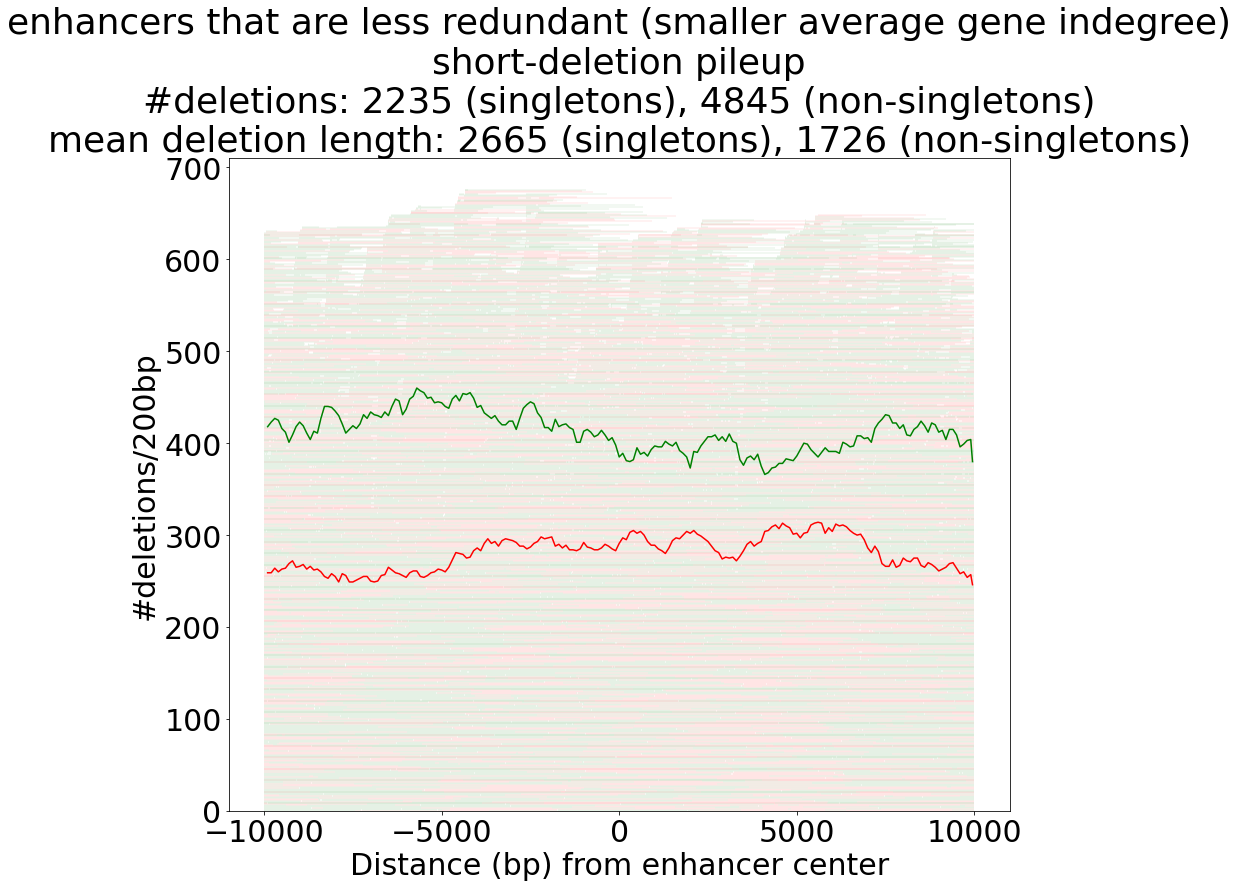

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-medium-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions-coverage.bed



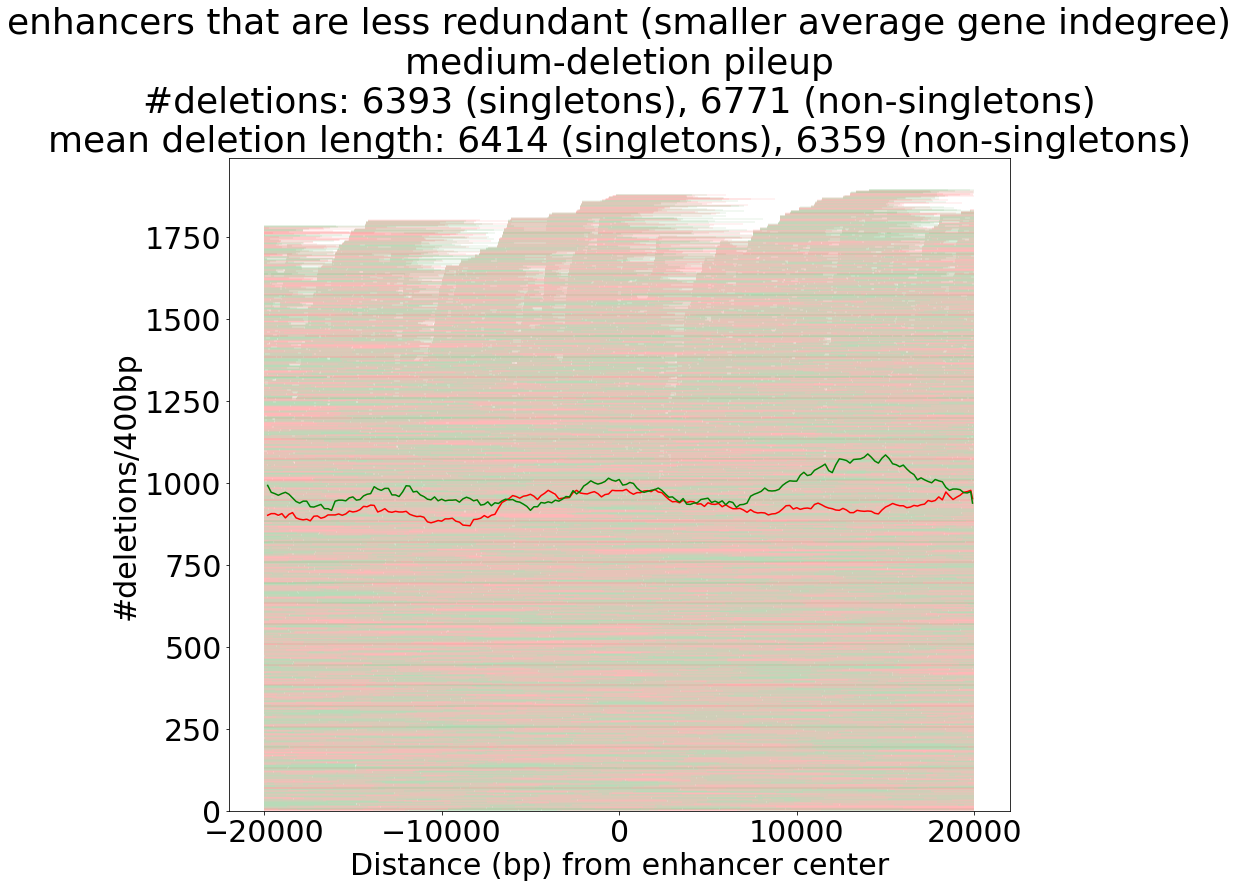

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



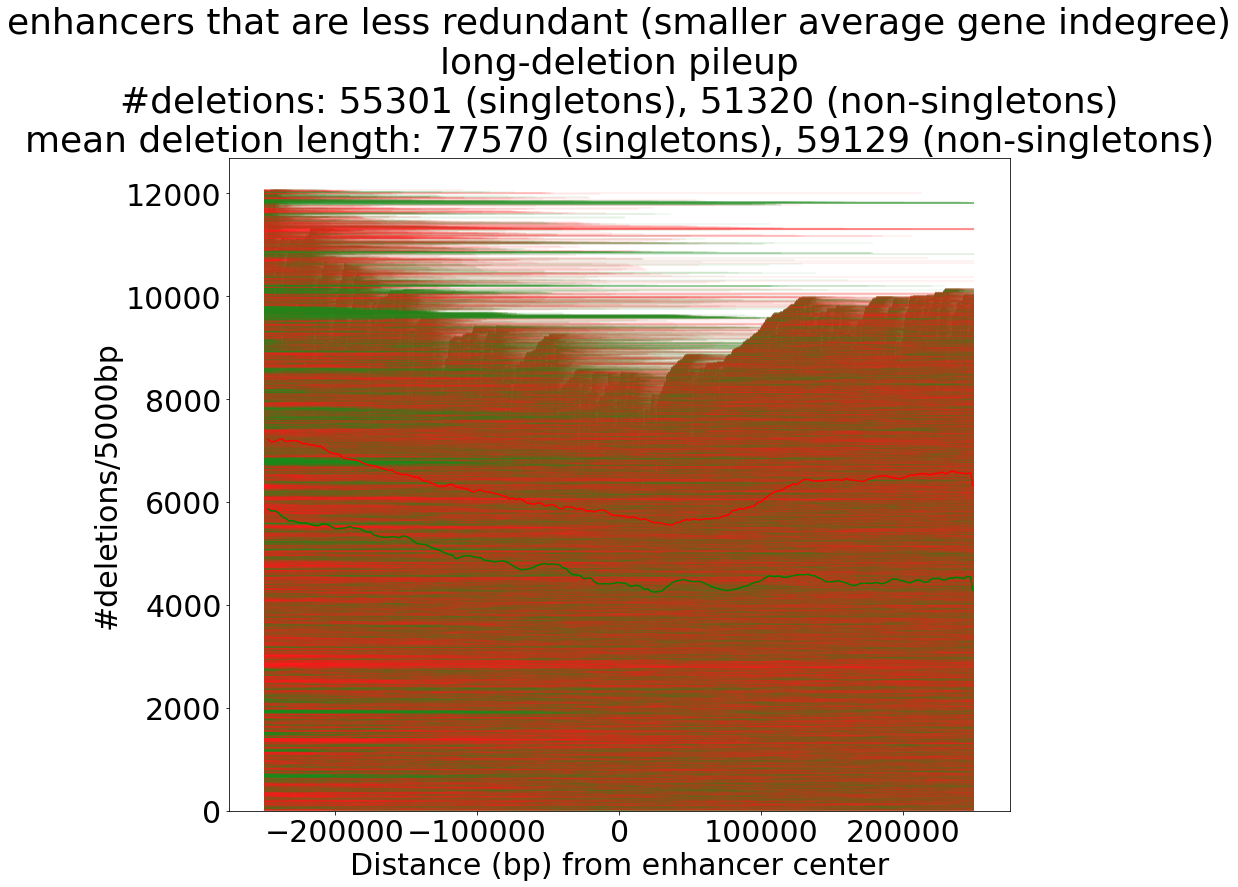

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



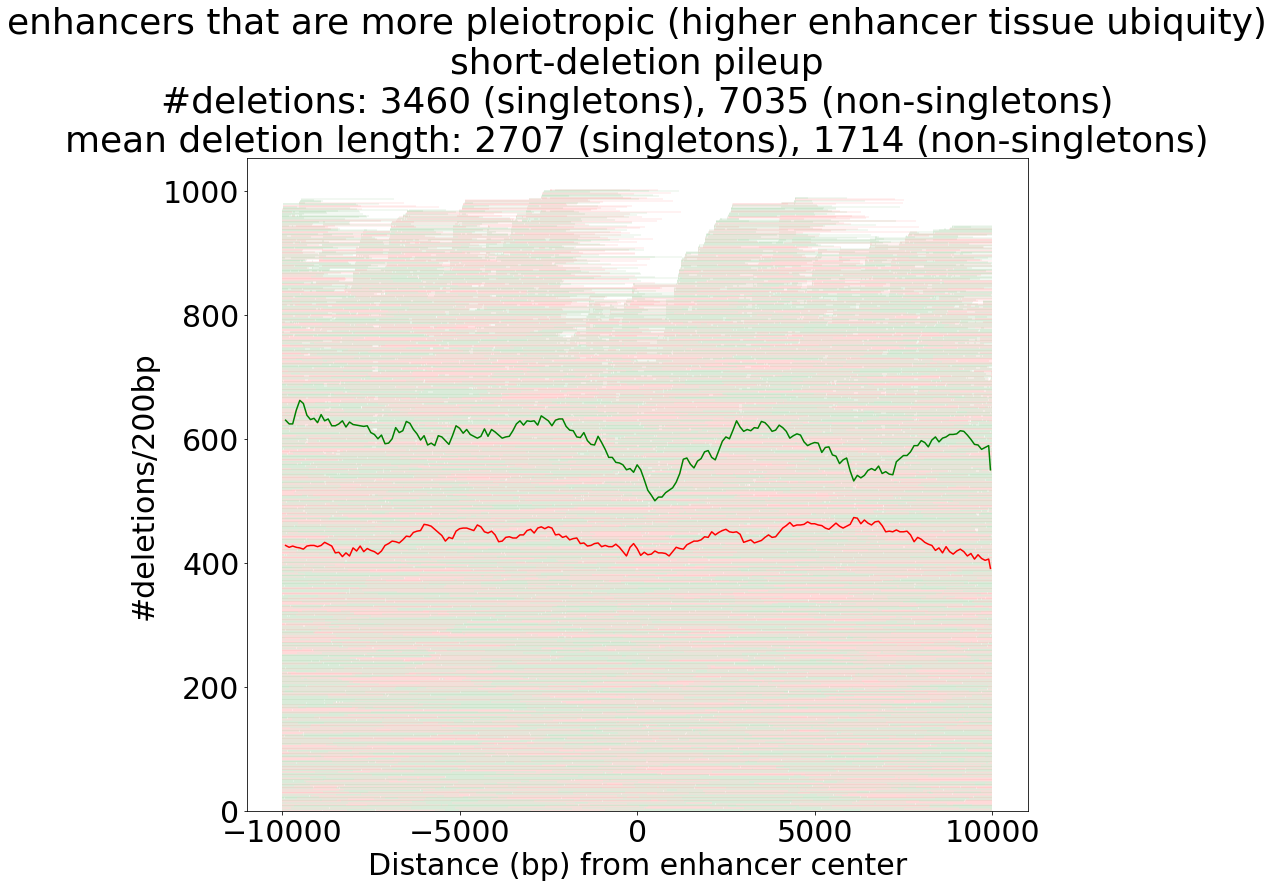

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-medium-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions-coverage.bed



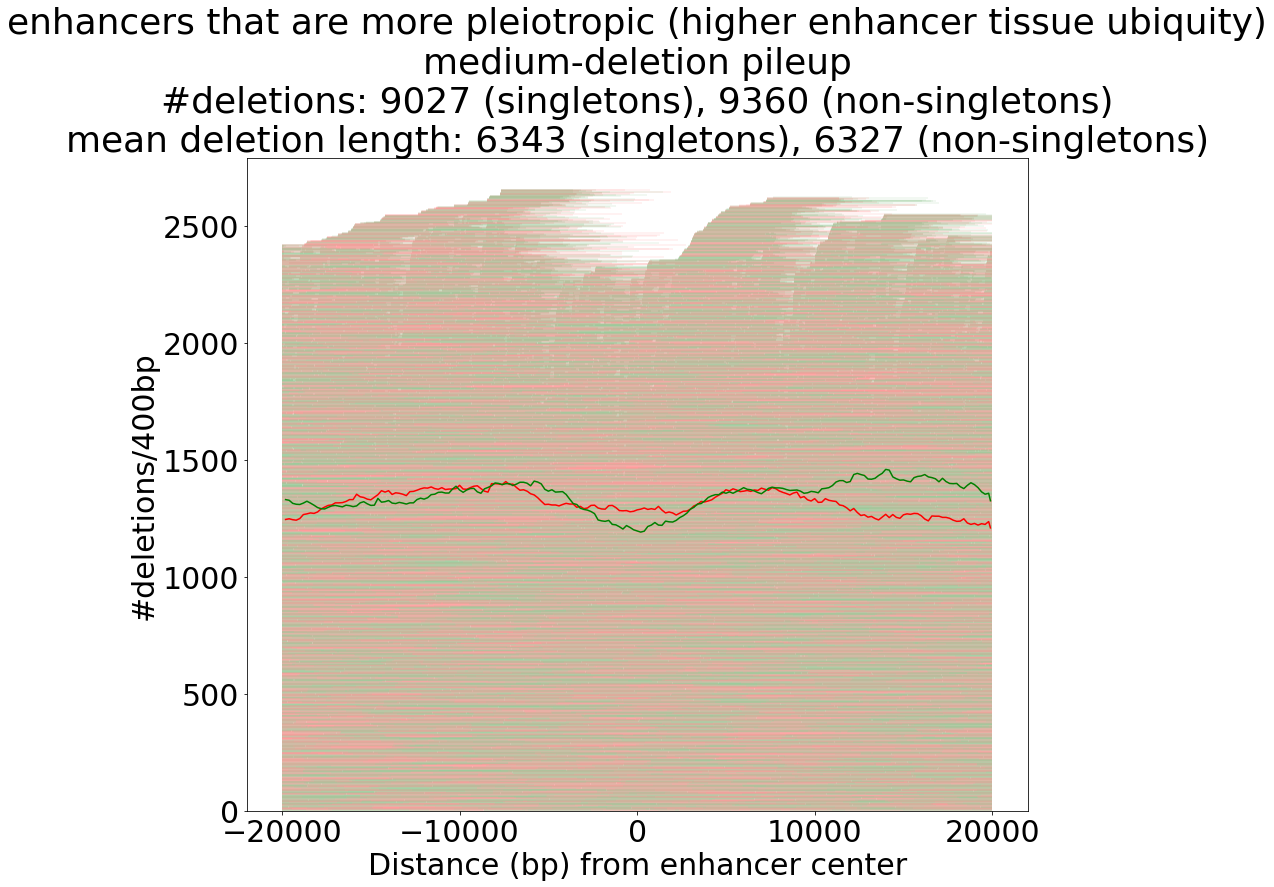

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



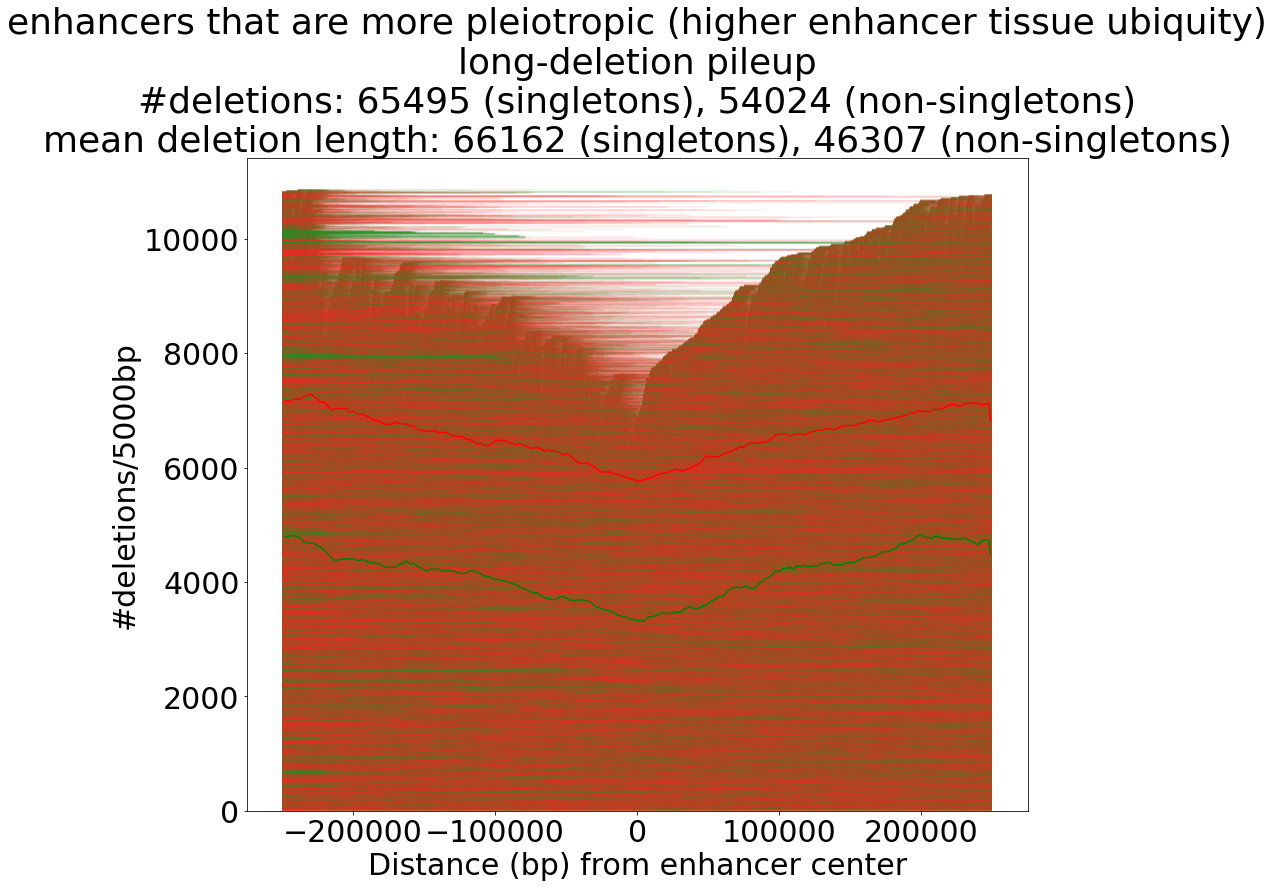

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



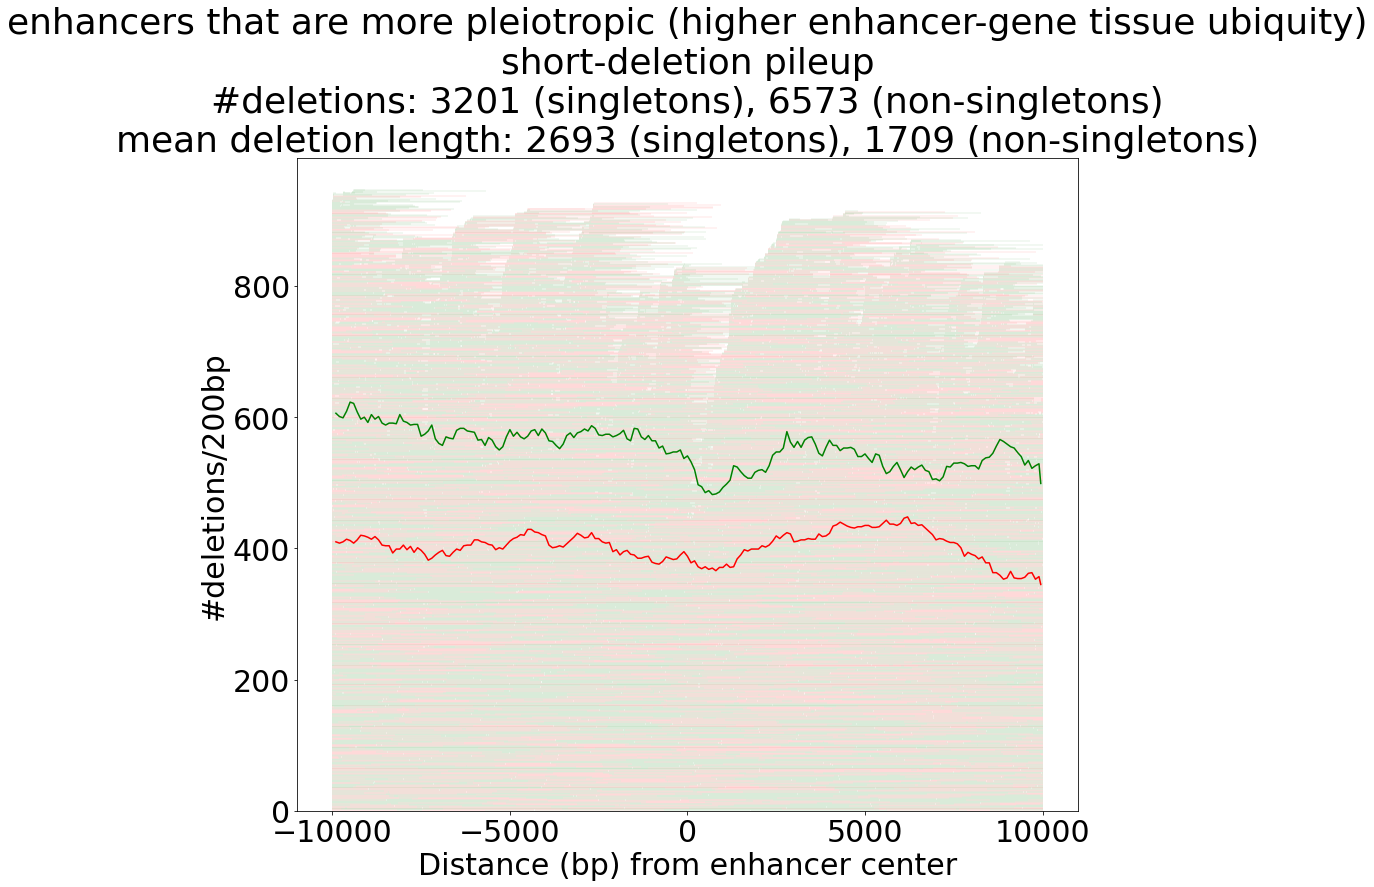

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-medium-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions-coverage.bed



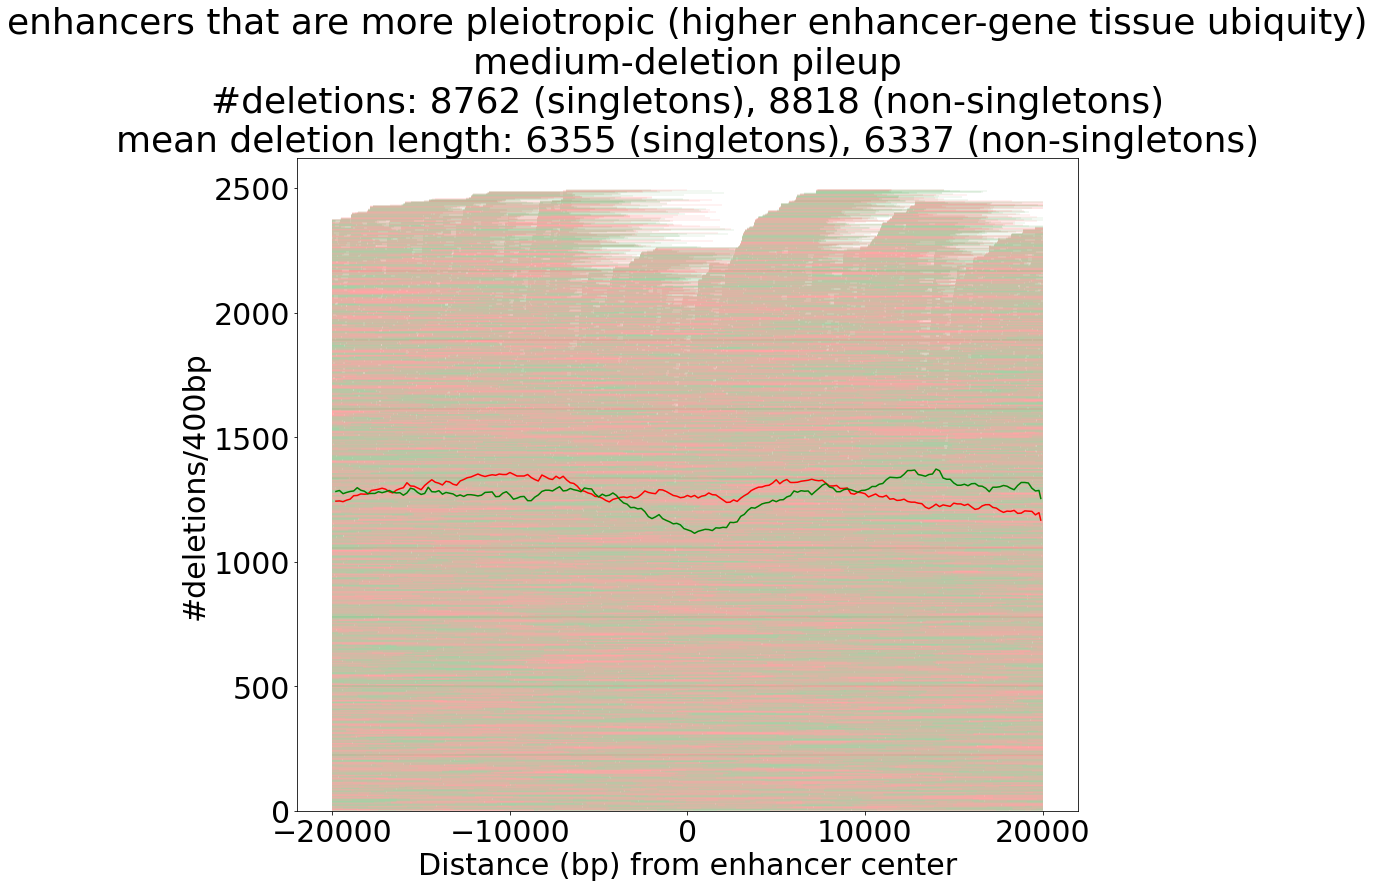

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



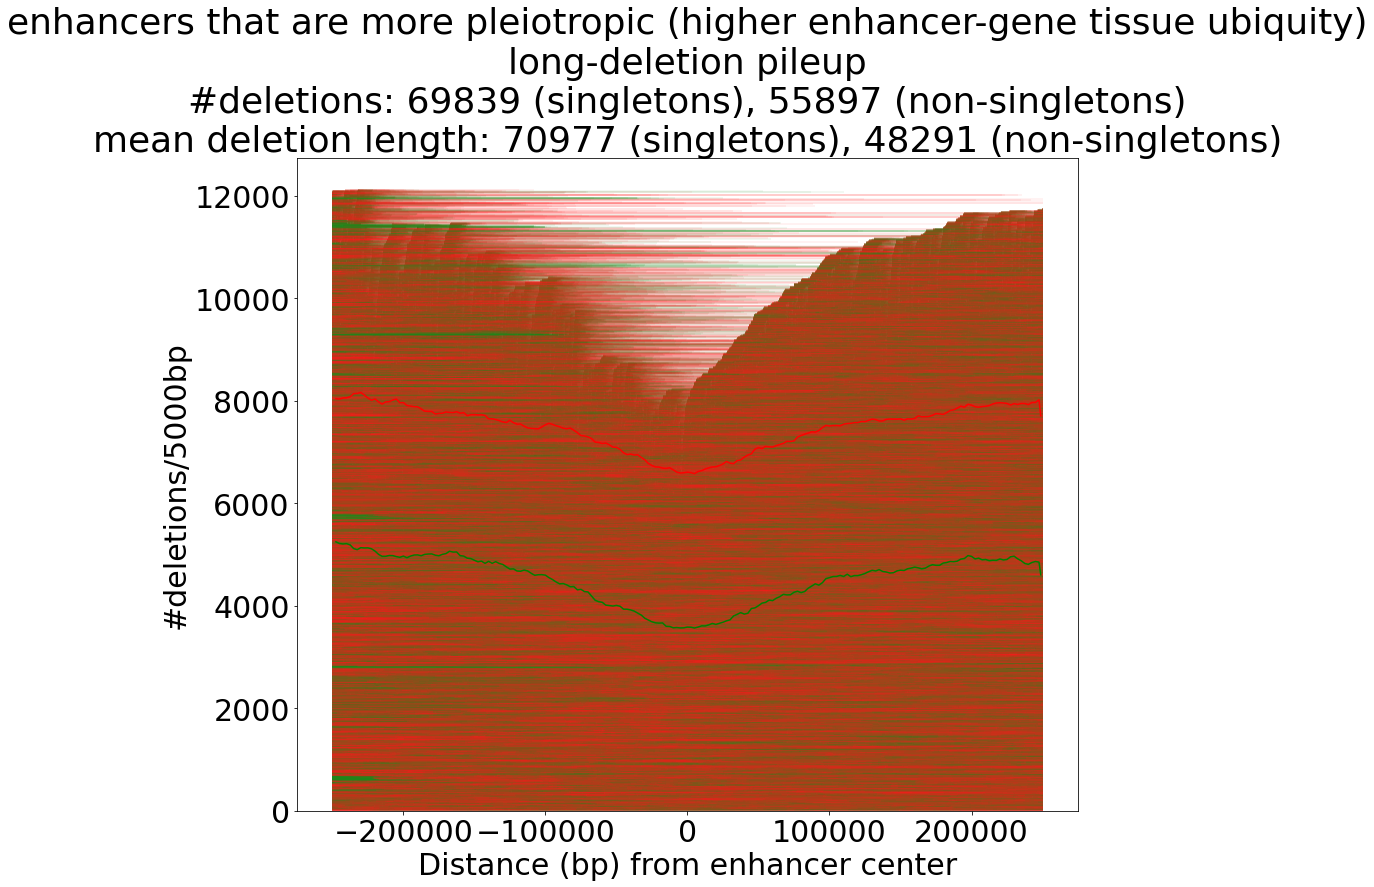

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



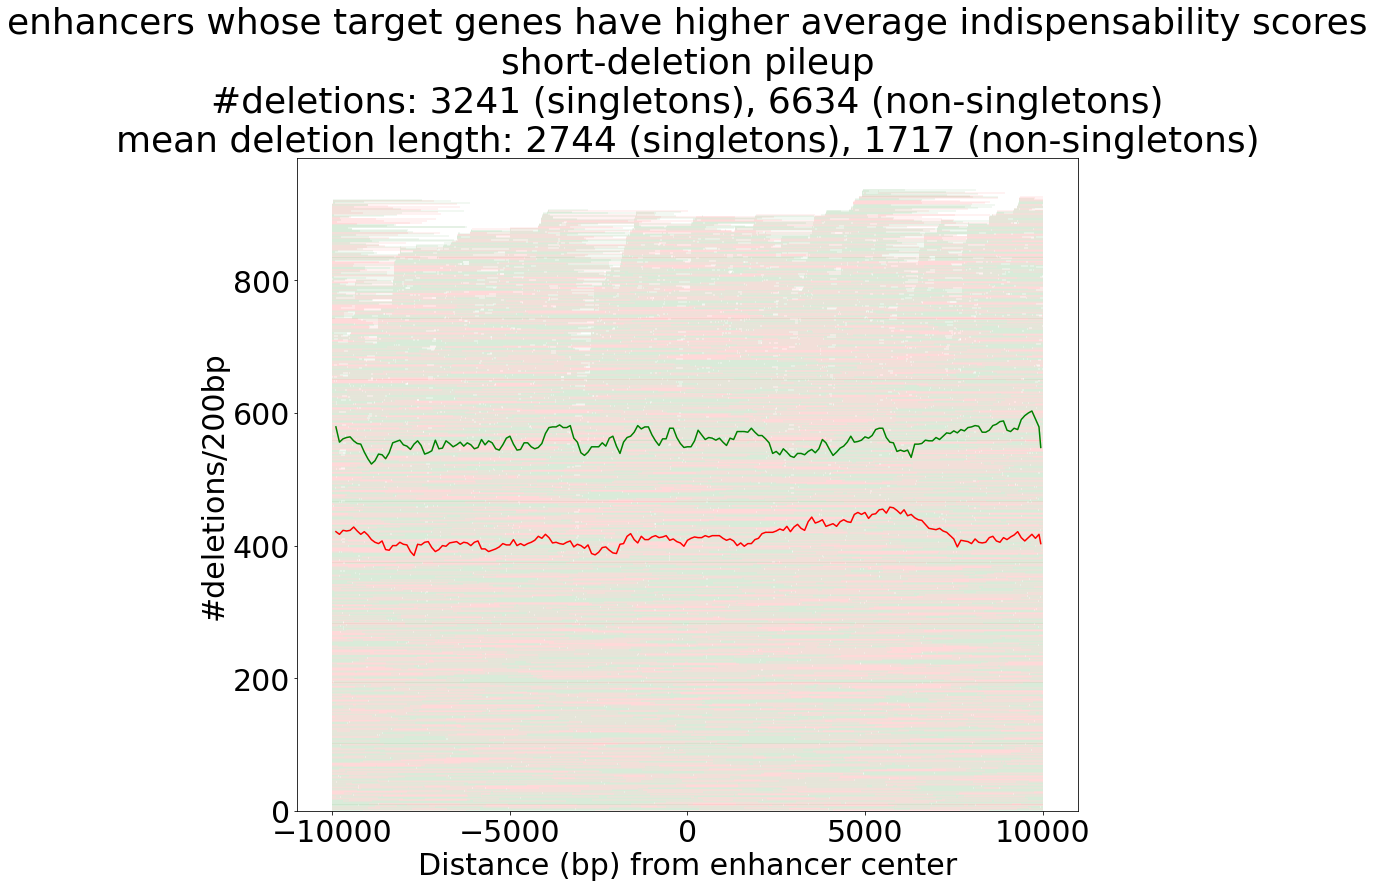

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-medium-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions-coverage.bed



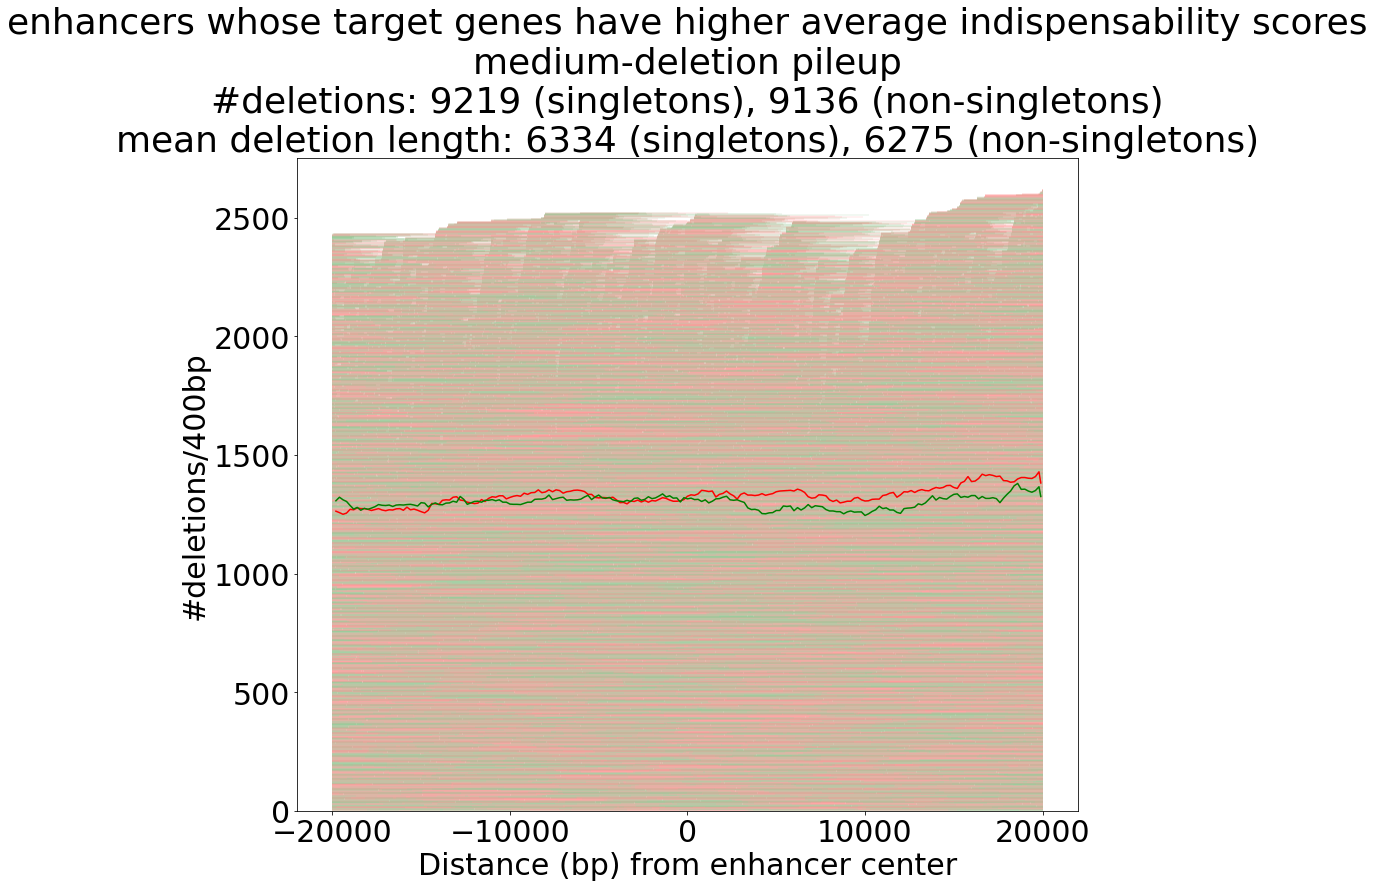

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



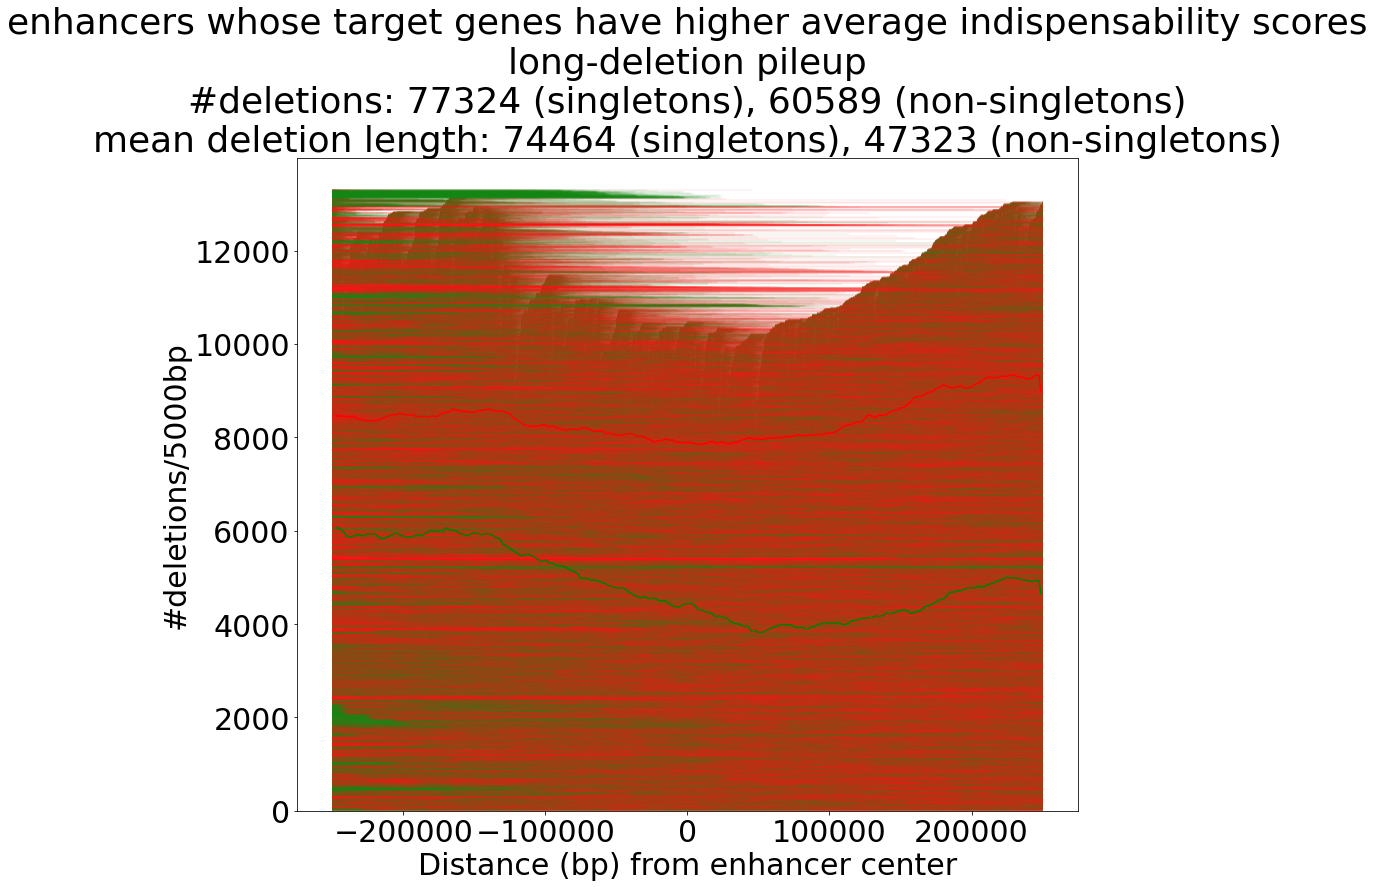

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



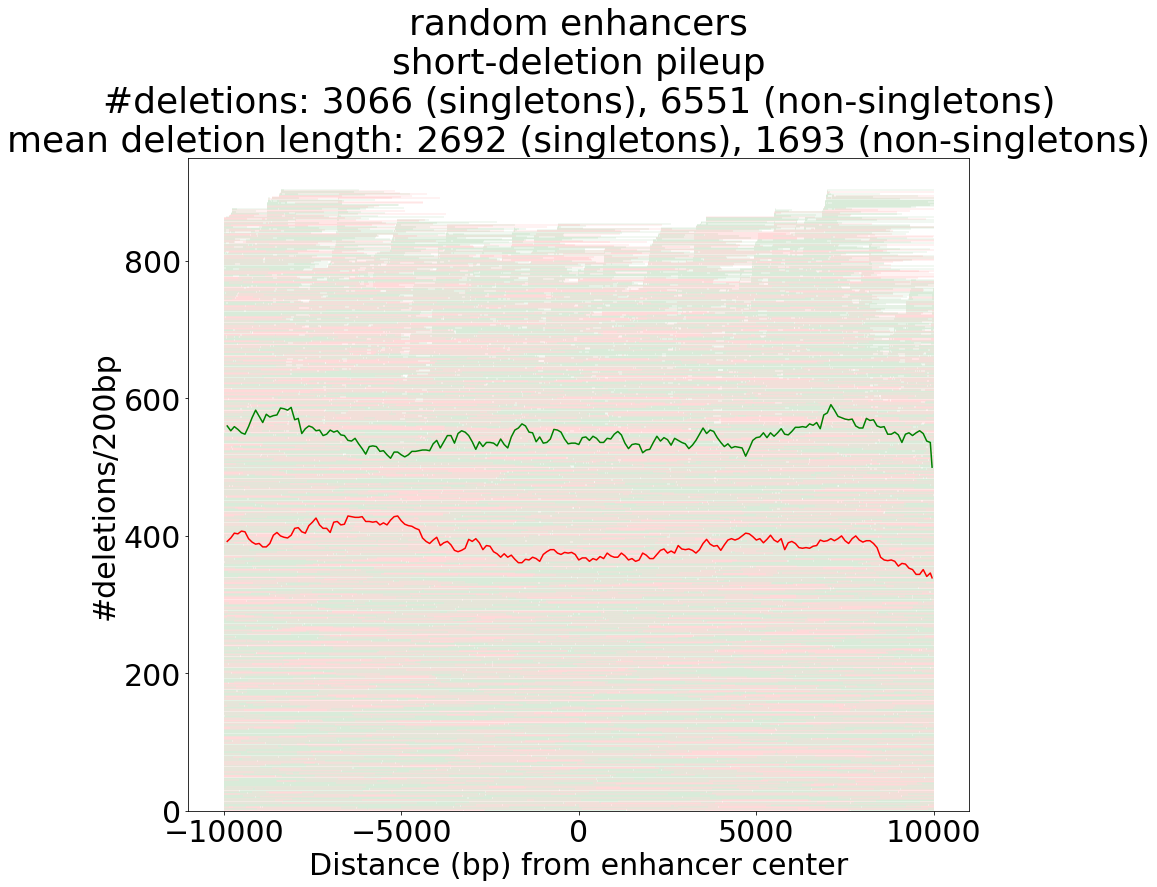

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-medium-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions-coverage.bed



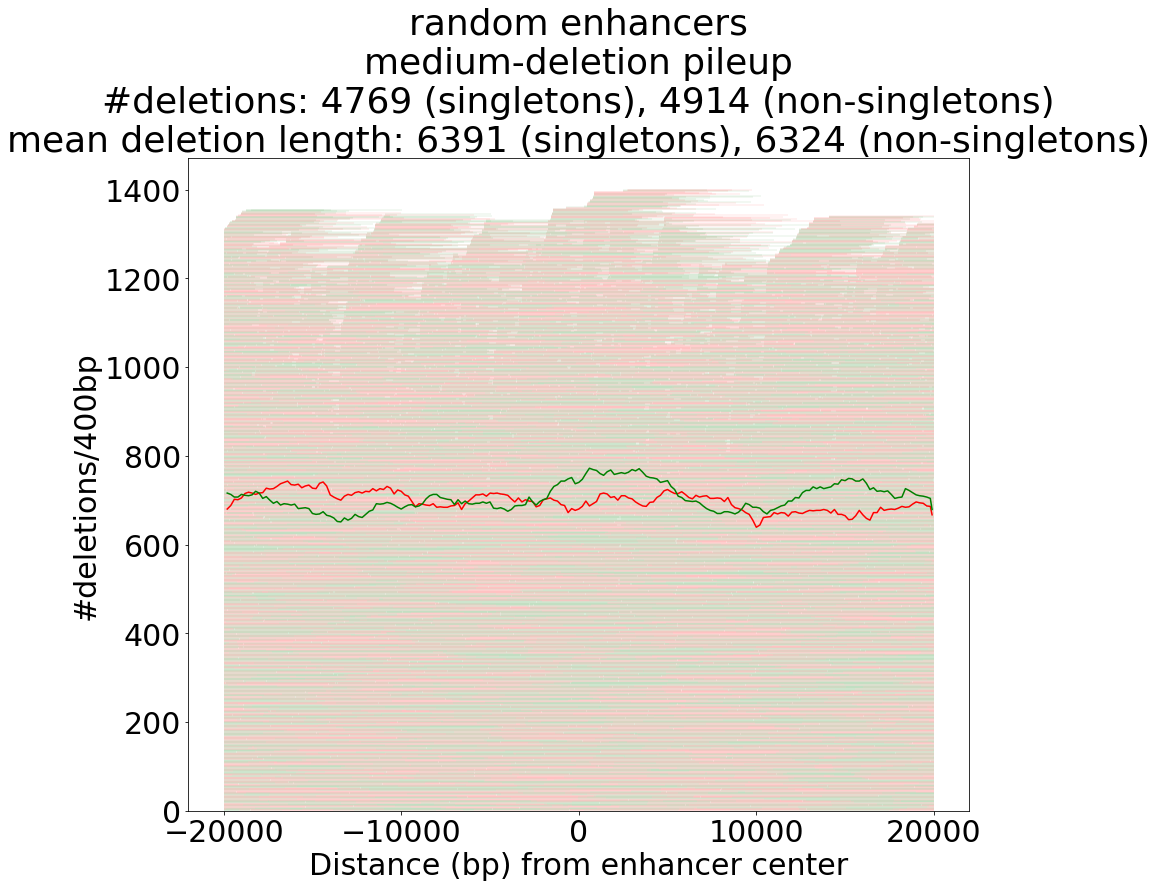

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



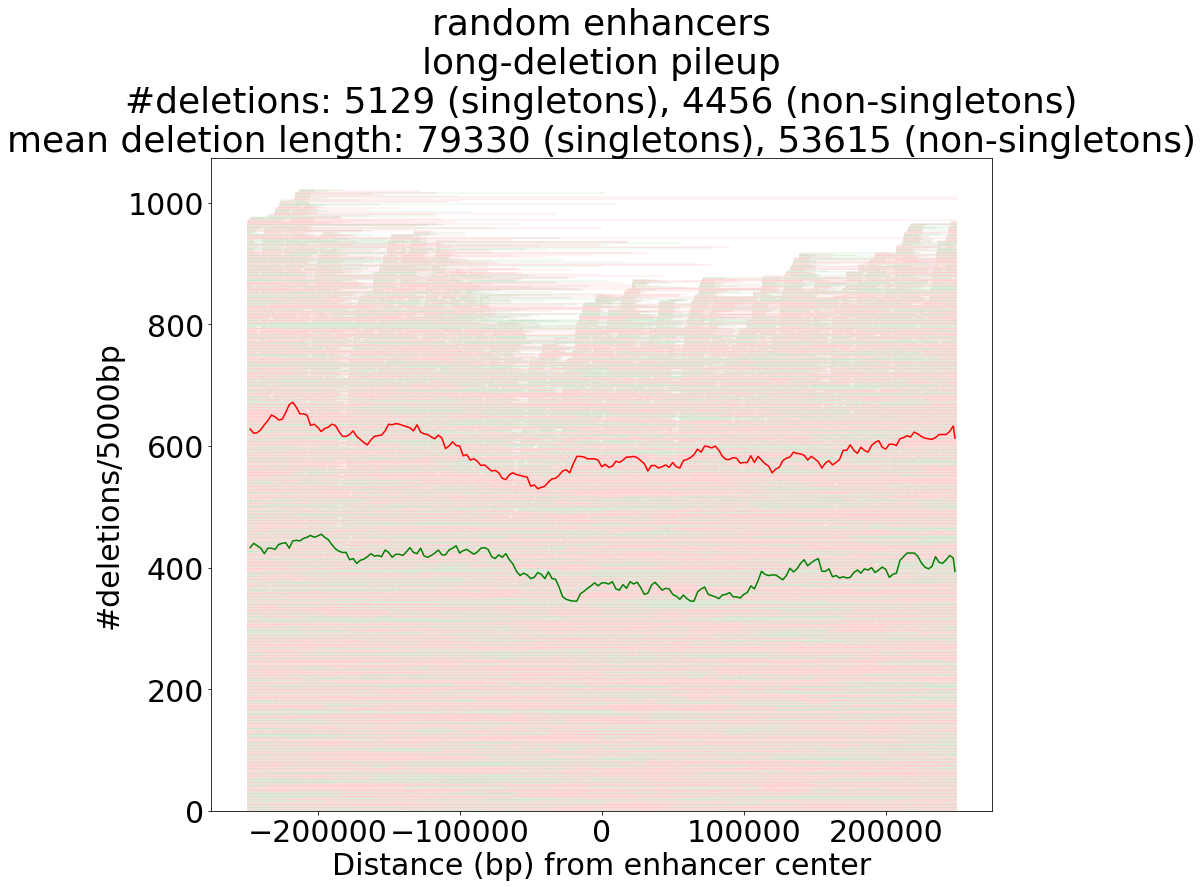

In [103]:
for filter_enhancers in [
  filter_1, 
  filter_2, 
  filter_3, 
  filter_4, 
  filter_5
]: 
  for deletion_type, window_size, ymax in zip(
    ['short', 'medium', 'long'],
    [20000, 40000, 500000],
    [None]*3
  ): 
    plot_pileup_and_coverage(
      deletion_type, 
      window_size,
      ymax, 
      plot_coverage=True,
      filter_enhancers=filter_enhancers
    )